In [1]:
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matgen import base, matutils
from importlib import reload

In [2]:
from numpy.random import default_rng
rng = default_rng()

In [52]:
def get_p(a):
    return round((a < 15).sum() / len(a), 3), round((a >= 15).sum() / len(a), 5)

In [80]:
def cdf1(angles):
    """
    angles in degrees
    all angles must be less than or equal to 45
    """
    x = np.radians(angles)
    return 180/math.pi*2/15*(x - np.sin(x))

def _cdf2(angles):
    """
    angles in degrees
    all angles must be greater than 45 and less than or equal to 60
    """
    x = np.radians(angles)
    return 180/math.pi*2/15*(3*(1 - np.sqrt(2))*np.cos(x) - 2*(x - np.sin(x)))

def cdf2(angles, precision: int = 5):
    """
    angles in degrees
    """
    prob = np.zeros_like(angles, dtype=float)
    angles_rad = np.radians(angles)
    
    mask = (angles >= 0)&(angles <= 45)
    x = angles[mask]
    prob[mask] = cdf1(x)
    
    mask = (angles > 45)&(angles <= 60)
    x = angles[mask]
    prob[mask] = _cdf2(x) - _cdf2(45) + cdf1(45)
    
    return np.round(prob, precision)

In [31]:
cellcomplex = base.CellComplex.from_tess_file('pass4_1_rand.tess')

Complex loaded: 3.2 s


In [32]:
len(cellcomplex._grains)

10283

In [33]:
grain_ids = np.array(list(cellcomplex._grains.keys()))

In [34]:
for g in cellcomplex._grains.values():
    g.rot_mtx = g.R

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 33.82it/s]


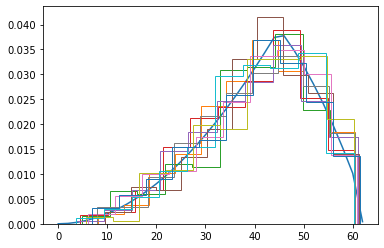

In [109]:
ps = []
Hs = []
plt.plot(x, y)
for _ in range(10):
    sample = rng.choice(grain_ids, size=100, replace=False)
    angles = []
    for g1 in tqdm(cellcomplex.get_many('f', sample)):
        n_ids = g1.n_ids
        for n_id in n_ids:
            if g1.id < n_id:
                angle = matutils.calculate_disorient(
                    g1.rot_mtx,
                    cellcomplex._grains[n_id].rot_mtx,
                    g1.crysym)
                angles.append(angle)
    angles = np.array(angles)
    angles = angles[angles <= 62]
    p = get_p(angles)[0]
    P = np.histogram(angles, bins=x)[0] / len(angles)
    H = matutils._hellinger(P, Q_baseline)
    ps.append(p)
    Hs.append(H)
    plt.hist(angles, density=True, histtype='step')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 33.24it/s]


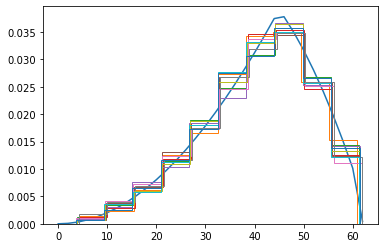

In [114]:
ps = []
Hs = []
plt.plot(x, y)
for _ in range(10):
    sample = rng.choice(grain_ids, size=1000, replace=False)
    angles = []
    for g1 in tqdm(cellcomplex.get_many('f', sample)):
        n_ids = g1.n_ids
        for n_id in n_ids:
            if g1.id < n_id:
                angle = matutils.calculate_disorient(
                    g1.rot_mtx,
                    cellcomplex._grains[n_id].rot_mtx,
                    g1.crysym)
                angles.append(angle)
    angles = np.array(angles)
    angles = angles[angles <= 62]
    p = get_p(angles)[0]
    P = np.histogram(angles, bins=x)[0] / len(angles)
    H = matutils._hellinger(P, Q_baseline)
    ps.append(p)
    Hs.append(H)
    plt.hist(angles, density=True, histtype='step')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 33.24it/s]


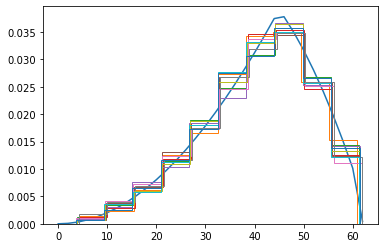

In [114]:
ps = []
Hs = []
plt.plot(x, y)
for _ in range(10):
    sample = rng.choice(grain_ids, size=1000, replace=False)
    angles = []
    for g1 in tqdm(cellcomplex.get_many('f', sample)):
        n_ids = g1.n_ids
        for n_id in n_ids:
            if g1.id < n_id:
                angle = matutils.calculate_disorient(
                    g1.rot_mtx,
                    cellcomplex._grains[n_id].rot_mtx,
                    g1.crysym)
                angles.append(angle)
    angles = np.array(angles)
    angles = angles[angles <= 62]
    p = get_p(angles)[0]
    P = np.histogram(angles, bins=x)[0] / len(angles)
    H = matutils._hellinger(P, Q_baseline)
    ps.append(p)
    Hs.append(H)
    plt.hist(angles, density=True, histtype='step')
plt.show()

In [71]:
samples= {}

In [73]:
N = 10
size = 1000
samples[size] = []
for i in tqdm(range(N)):
    angles = []
    for _ in range(size):
        id1, id2 = rng.choice(grain_ids, size=2, replace=False)
        #print(i, id1, id2)
        angle = matutils.calculate_disorient(
                        cellcomplex._grains[id1].rot_mtx,
                        cellcomplex._grains[id2].rot_mtx,
                        cellcomplex.crysym)
        angles.append(angle)
    samples[size].append(angles)
samples[size] = np.array(samples[size])
# print(get_p(np.array(angles)))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:35<00:00,  9.57s/it]


In [74]:
samples[size].shape

(10, 1000)

In [79]:
samples[size][:10][:10]

array([[42.61738148, 52.69123444, 23.26690312, ..., 45.41376508,
        50.28941026, 44.97129534],
       [25.04659831, 37.36089981, 28.93887559, ..., 53.08304342,
        48.67557732, 56.62283797],
       [ 4.59118529, 55.65812099, 47.64865133, ..., 50.88297883,
        30.58363124, 54.6659119 ],
       ...,
       [44.00341158, 32.44856675, 44.05838263, ..., 39.87962312,
        48.47525253, 44.76517117],
       [57.03977333, 40.72601274, 26.72679477, ..., 42.64608772,
        47.84327613, 33.88452377],
       [51.96223603, 39.87753035, 56.53345482, ..., 41.14603615,
        31.16716376, 35.26552622]])

In [75]:
get_p(samples[size])

(25.4, 974.6)

In [20]:
np.histogram(angles, bins=[0, 15, 63])[0][0] / len(angles)

0.02195

In [69]:
np.histogram(angles, bins=[0, 15, 30, 45, 60, 63])[0] / len(angles)

array([0.029, 0.158, 0.394, 0.412, 0.007])

In [70]:
np.histogram(angles, bins=[0, 15, 30, 45, 60, 63])[1]

array([ 0, 15, 30, 45, 60, 63])

In [68]:
np.histogram(angles, bins=x)[0] / len(angles)

array([0.   , 0.001, 0.   , 0.003, 0.   , 0.008, 0.012, 0.012, 0.012,
       0.016, 0.02 , 0.02 , 0.024, 0.022, 0.037, 0.037, 0.045, 0.03 ,
       0.05 , 0.064, 0.065, 0.06 , 0.08 , 0.071, 0.074, 0.073, 0.063,
       0.034, 0.035, 0.025, 0.007])

In [62]:
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 63])

In [113]:
# ps100 = ps
# Hs100 = Hs

In [132]:
ps5000 = ps
Hs5000 = Hs

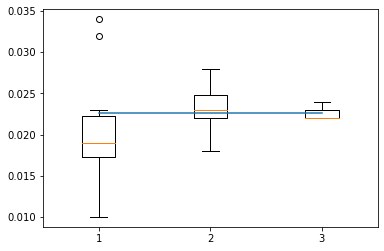

In [133]:
plt.boxplot([ps100, ps1000, ps5000])
plt.plot([1,2,3], [p2_baseline, p2_baseline, p2_baseline])
plt.show()

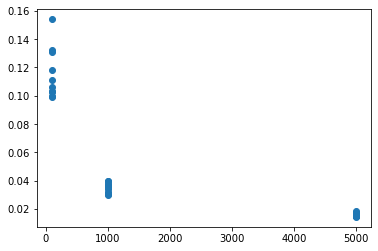

In [134]:
plt.scatter([[100]*10, [1000]*10, [5000]*10], [Hs100, Hs1000, Hs5000])
plt.show()

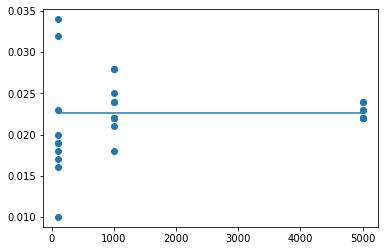

In [136]:
plt.scatter([[100]*10, [1000]*10, [5000]*10], [ps100, ps1000, ps5000])
plt.plot([100, 1000, 5000], [p2_baseline, p2_baseline, p2_baseline])
plt.show()

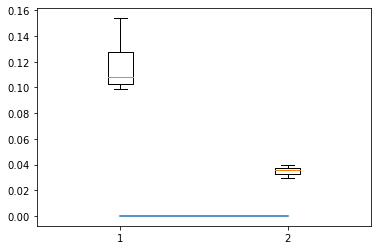

In [123]:
plt.boxplot([Hs100, Hs1000])
plt.plot([1,2], [0, 0])
plt.show()

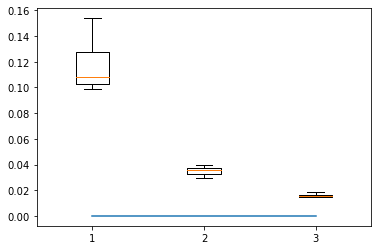

In [140]:
plt.boxplot([Hs100, Hs1000, Hs5000])
plt.plot([1,2, 3], [0, 0, 0])
plt.show()

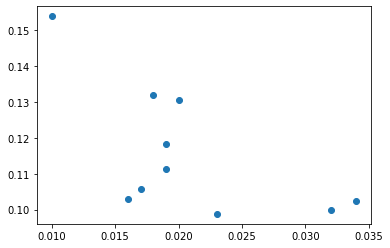

In [137]:
plt.scatter(ps100, Hs100)

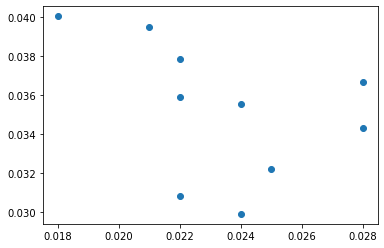

In [138]:
plt.scatter(ps1000, Hs1000)

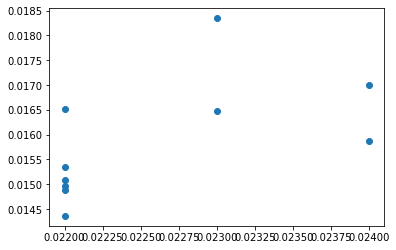

In [139]:
plt.scatter(ps5000, Hs5000)

In [76]:
np.histogram(angles, bins=x)[0] / len(angles)

array([0.        , 0.        , 0.00692042, 0.        , 0.00346021,
       0.00692042, 0.00346021, 0.01384083, 0.01038062, 0.01038062,
       0.01730104, 0.01384083, 0.0449827 , 0.02076125, 0.02422145,
       0.03114187, 0.02076125, 0.03460208, 0.07612457, 0.06574394,
       0.06920415, 0.06574394, 0.08650519, 0.06574394, 0.06228374,
       0.05882353, 0.05882353, 0.05190311, 0.05536332, 0.01730104,
       0.00346021])

In [79]:
get_p(np.array(angles))

(0.028, 0.972)

In [91]:
x.shape

(32,)

In [6]:
x = np.arange(0, 63, 2)

In [7]:
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62])

In [10]:
reload(matutils)

<module 'matgen.matutils' from 'C:\\Users\\Oleg\\Documents\\GitHub\\Voronoi_DCC_Analyser\\matgen\\matutils.py'>

In [8]:
matutils.mackenzie_pmf(x[:-1])

array([5.000e-05, 3.800e-04, 1.030e-03, 2.000e-03, 3.300e-03, 4.910e-03,
       6.850e-03, 9.100e-03, 1.166e-02, 1.455e-02, 1.772e-02, 2.121e-02,
       2.500e-02, 2.907e-02, 3.345e-02, 3.810e-02, 4.303e-02, 4.824e-02,
       5.371e-02, 5.944e-02, 6.542e-02, 7.165e-02, 7.665e-02, 7.271e-02,
       6.663e-02, 5.979e-02, 5.225e-02, 4.399e-02, 3.502e-02, 2.537e-02])

In [13]:
matutils.mackenzie_pmf(x)

array([5.000e-05, 3.800e-04, 1.030e-03, 2.000e-03, 3.300e-03, 4.910e-03,
       6.850e-03, 9.100e-03, 1.166e-02, 1.455e-02, 1.772e-02, 2.121e-02,
       2.500e-02, 2.907e-02, 3.345e-02, 3.810e-02, 4.303e-02, 4.824e-02,
       5.371e-02, 5.944e-02, 6.542e-02, 7.165e-02, 7.665e-02, 7.271e-02,
       6.663e-02, 5.979e-02, 5.225e-02, 4.399e-02, 3.502e-02, 2.537e-02,
       7.720e-03])

In [23]:
P

array([0.        , 0.00026199, 0.00153917, 0.00160466, 0.00311108,
       0.00537071, 0.00628766, 0.0091695 , 0.01087241, 0.01401624,
       0.01807702, 0.02108986, 0.0258711 , 0.0287857 , 0.03530259,
       0.03831543, 0.04522531, 0.0482054 , 0.05416558, 0.0592743 ,
       0.0648415 , 0.07132565, 0.07656537, 0.07171863, 0.06605318,
       0.05776788, 0.05318313, 0.04316217, 0.03592481, 0.02534713,
       0.00756484])

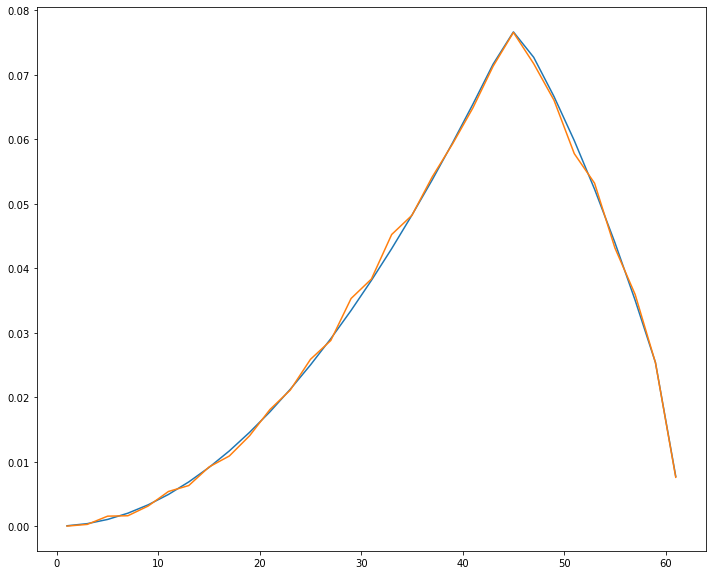

In [27]:
plt.figure(figsize=(12,10))
plt.plot(x[:-1] + 1, matutils.mackenzie_pmf(x))
plt.plot(x[:-1] + 1, P)
plt.show()

In [30]:
max(matutils.mackenzie_pmf(x) - P)

0.002022119465548873

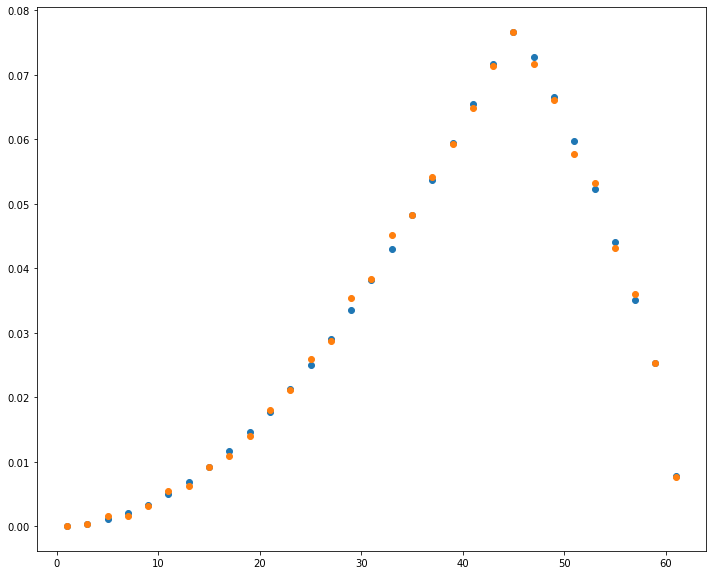

In [28]:
plt.figure(figsize=(12,10))
plt.scatter(x[:-1] + 1, matutils.mackenzie_pmf(x))
plt.scatter(x[:-1] + 1, P)
plt.show()

In [3]:
filename = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_01Cr_01Zr\\Neper_RandomOri_Cu-0.1Cr-0.1Zr\pass4\disangles\disangles1.txt'
random_distr = np.loadtxt(filename)

In [9]:
filename = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_01Cr_01Zr\\Neper_RandomOri_Cu-0.1Cr-0.1Zr\pass4\disangles\disangles8.txt'
random_distr2 = np.loadtxt(filename)

In [8]:
random_distr2.shape

(388590,)

In [10]:
x = np.array([*range(0, 62, 2)] + [63])

In [49]:
N = 100
sizes = [100, 250, 500, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000, 100000, 200000]
samples = {}
for size in sizes:
    #print(size)
    samples[size] = []
    for i in range(N):
        angles = rng.choice(random_distr2, size=size, replace=False)
        samples[size].append(angles)

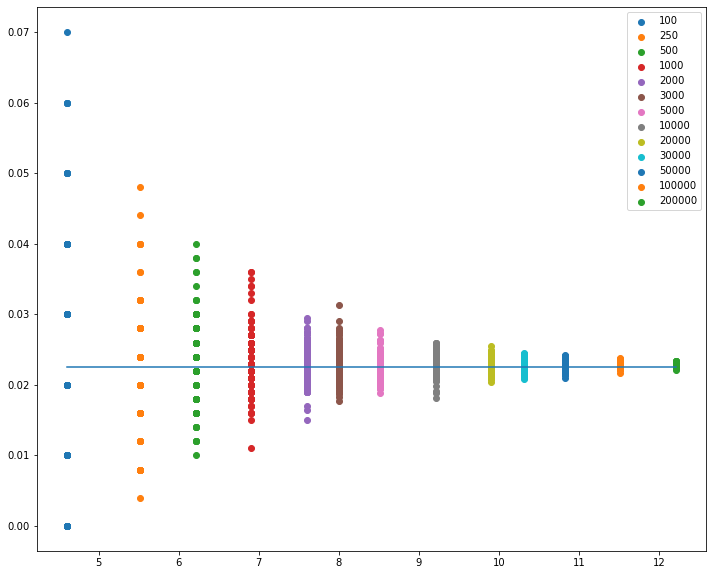

In [50]:
plt.figure(figsize=(12,10))
ps = {}
for size in sizes:
    ps[size] = []
    for i in range(N):
        ps[size].append(np.histogram(samples[size][i], bins=[0, 15, 63])[0][0] / len(samples[size][i]))
    plt.scatter([np.log(size)]*N, ps[size], label=str(size))
plt.plot(np.log(sizes), [0.0226]*len(sizes))
plt.legend(loc='best')
plt.show()

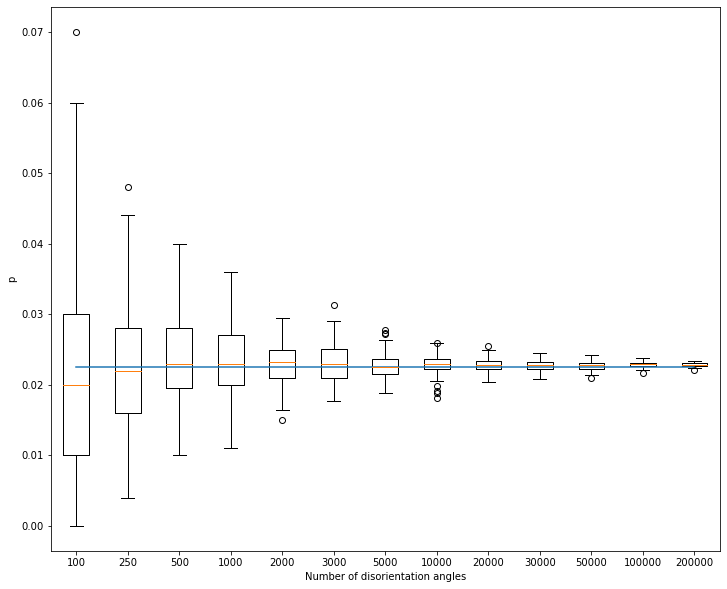

In [87]:
plt.figure(figsize=(12,10))
ps = {}
Hs = {}
for size in sizes:
    ps[size] = []
    for i in range(N):
        ps[size].append(np.histogram(samples[size][i], bins=[0, 15, 63])[0][0] / len(samples[size][i]))
        HS

plt.boxplot(ps.values(), labels=[*map(str,sizes)])
plt.plot([*range(1, len(sizes) + 1)], [0.0226]*len(sizes))
# plt.legend(loc='best')
plt.xlabel('Number of disorientation angles')
plt.ylabel('p')
plt.show()

In [119]:
Q

array([0.02277, 0.9774 ])

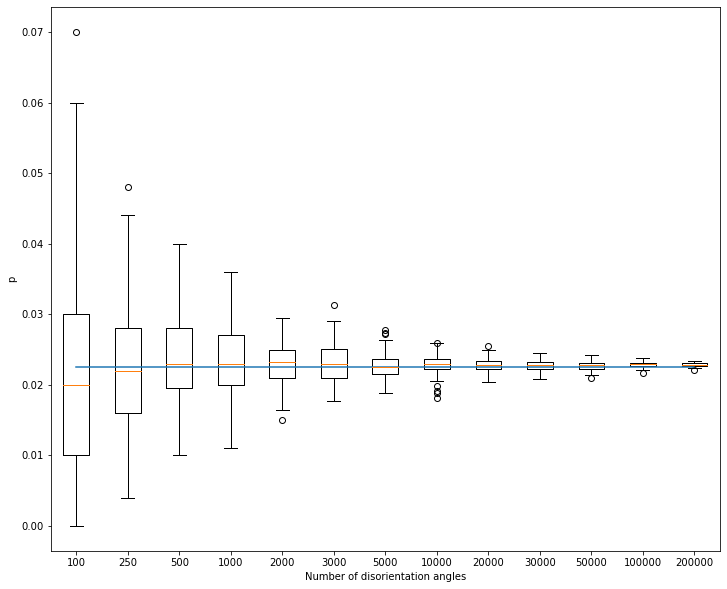

In [105]:
plt.figure(figsize=(12,10))
ps = {}
p2s = {}
for size in sizes:
    ps[size] = []
    
    for i in range(N):
        ps[size].append(np.histogram(samples[size][i], bins=[0, 15, 30, 63])[0][0] / len(samples[size][i]))
        
plt.boxplot(ps.values(), labels=[*map(str,sizes)])
plt.plot([*range(1, len(sizes) + 1)], [0.0226]*len(sizes))
# plt.legend(loc='best')
plt.xlabel('Number of disorientation angles')
plt.ylabel('p')
plt.show()

In [106]:
plt.figure(figsize=(12,10))
ps = {}
p2s = {}
for size in sizes:
    ps[size] = []
    p2s[size] = []
    for i in range(N):
        P = np.histogram(samples[size][i], bins=[0, 15, 30, 63])[0] / len(samples[size][i])
        ps[size].append(P[0])
        p2s[size].append(P[1])
# plt.scatter(p2s.values(), ps.values(), labels=[*map(str,sizes)])
# plt.plot([*range(1, len(sizes) + 1)], [0.0226]*len(sizes))
# plt.legend(loc='best')
# plt.xlabel('Number of disorientation angles')
# plt.ylabel('p')
# plt.show()

<Figure size 864x720 with 0 Axes>

In [123]:
[*zip(ps[100], p2s[100])]

[(0.01, 0.21),
 (0.01, 0.18),
 (0.03, 0.14),
 (0.03, 0.18),
 (0.01, 0.16),
 (0.0, 0.13),
 (0.02, 0.21),
 (0.03, 0.2),
 (0.03, 0.17),
 (0.01, 0.1),
 (0.0, 0.15),
 (0.04, 0.11),
 (0.01, 0.15),
 (0.04, 0.27),
 (0.01, 0.15),
 (0.03, 0.24),
 (0.03, 0.23),
 (0.02, 0.23),
 (0.04, 0.15),
 (0.03, 0.18),
 (0.01, 0.25),
 (0.02, 0.19),
 (0.02, 0.15),
 (0.01, 0.17),
 (0.04, 0.21),
 (0.02, 0.22),
 (0.03, 0.19),
 (0.02, 0.1),
 (0.02, 0.19),
 (0.03, 0.15),
 (0.06, 0.11),
 (0.02, 0.16),
 (0.06, 0.21),
 (0.04, 0.13),
 (0.0, 0.2),
 (0.02, 0.17),
 (0.01, 0.14),
 (0.02, 0.13),
 (0.0, 0.17),
 (0.04, 0.07),
 (0.01, 0.2),
 (0.0, 0.1),
 (0.04, 0.13),
 (0.05, 0.17),
 (0.04, 0.12),
 (0.02, 0.19),
 (0.06, 0.12),
 (0.01, 0.17),
 (0.02, 0.13),
 (0.01, 0.21),
 (0.01, 0.14),
 (0.02, 0.22),
 (0.02, 0.18),
 (0.02, 0.16),
 (0.06, 0.18),
 (0.05, 0.22),
 (0.02, 0.18),
 (0.04, 0.13),
 (0.01, 0.11),
 (0.0, 0.17),
 (0.02, 0.17),
 (0.02, 0.16),
 (0.01, 0.09),
 (0.02, 0.21),
 (0.01, 0.19),
 (0.0, 0.23),
 (0.01, 0.11),
 (0.02, 

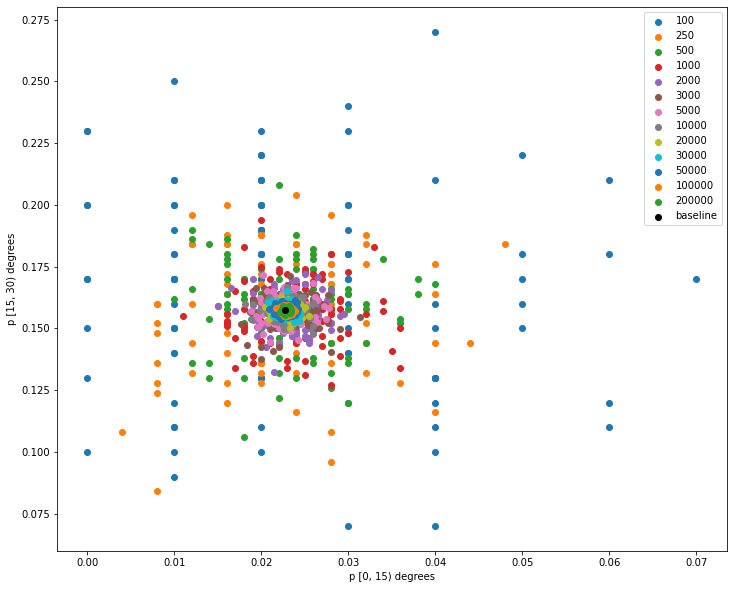

In [121]:
plt.figure(figsize=(12,10))
for size in sizes:
    plt.scatter(ps[size], p2s[size], label=str(size))
plt.scatter([0.02277], [0.15751], label='baseline', c='k')
plt.legend()
plt.xlabel('p [0, 15) degrees')
plt.ylabel('p [15, 30) degrees')
plt.show()

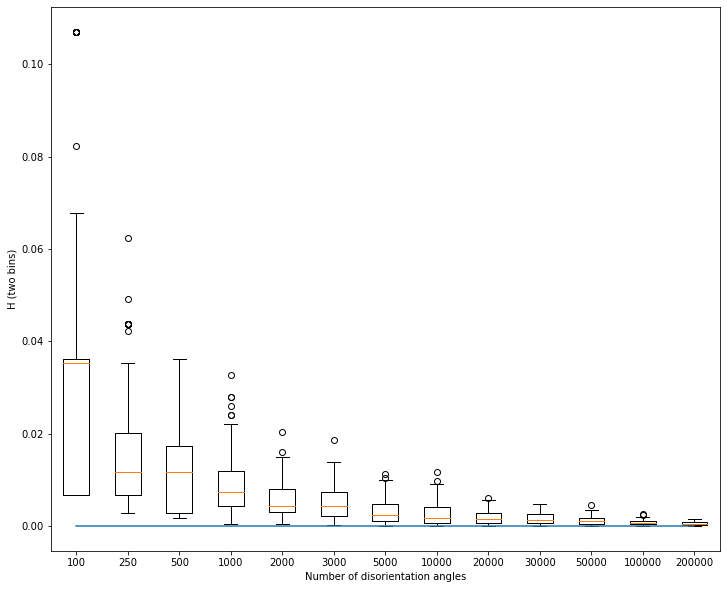

In [104]:
plt.figure(figsize=(12,10))
Q = np.array([0.02277, 0.9774])
ps = {}
Hs = {}
for size in sizes:
    ps[size] = []
    Hs[size] = []
    for i in range(N):
        p_i = np.histogram(samples[size][i], bins=[0, 15, 63])[0][0] / len(samples[size][i])
        ps[size].append(p_i)
        P = np.array([p_i, 1 - p_i])
        Hs[size].append(H2(P, Q))

plt.boxplot(Hs.values(), labels=[*map(str,sizes)])
plt.plot([*range(1, len(sizes) + 1)], [0]*len(sizes))
# plt.legend(loc='best')
plt.xlabel('Number of disorientation angles')
plt.ylabel('H (two bins)')
plt.show()

In [95]:
Q

array([0.02277, 0.15751, 0.81972])

In [99]:
P

array([0.02304, 0.15704, 0.81992])

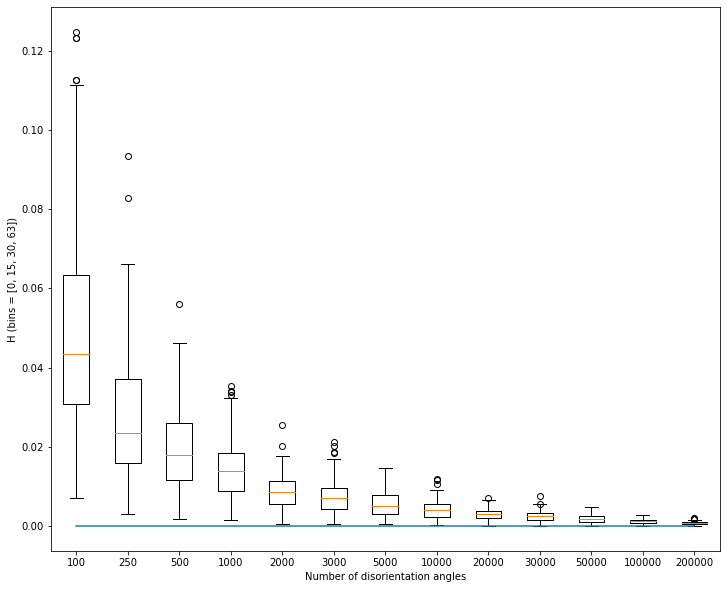

In [98]:
plt.figure(figsize=(12,10))
bins = [0, 15, 30, 63]
Q = matutils.mackenzie_pmf(np.array(bins))
ps = {}
Hs = {}
for size in sizes:
    Hs[size] = []
    for i in range(N):
        P = np.histogram(samples[size][i], bins=bins)[0] / len(samples[size][i])
        Hs[size].append(H2(P, Q))

plt.boxplot(Hs.values(), labels=[*map(str,sizes)])
plt.plot([*range(1, len(sizes) + 1)], [0]*len(sizes))
# plt.legend(loc='best')
plt.xlabel('Number of disorientation angles')
plt.ylabel('H (bins = [0, 15, 30, 63])')
plt.show()

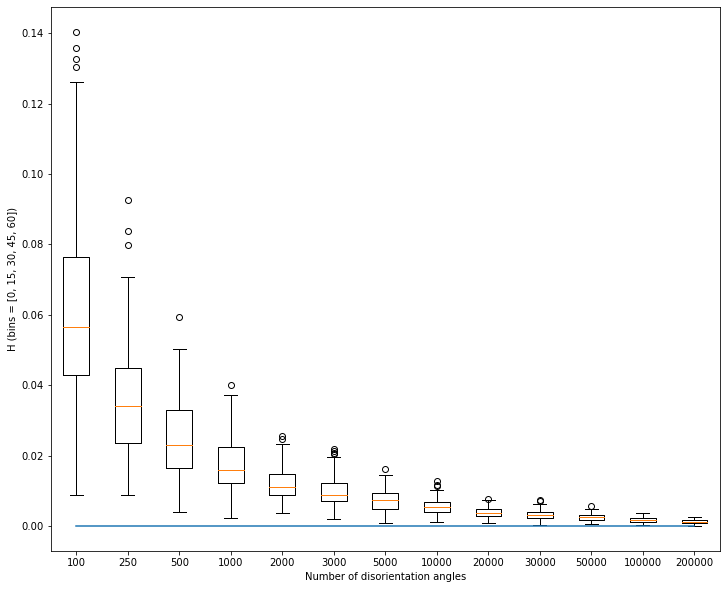

In [100]:
plt.figure(figsize=(12,10))
bins = [0, 15, 30, 45, 60]
Q = matutils.mackenzie_pmf(np.array(bins))
ps = {}
Hs = {}
for size in sizes:
    Hs[size] = []
    for i in range(N):
        P = np.histogram(samples[size][i], bins=bins)[0] / len(samples[size][i])
        Hs[size].append(H2(P, Q))

plt.boxplot(Hs.values(), labels=[*map(str,sizes)])
plt.plot([*range(1, len(sizes) + 1)], [0]*len(sizes))
# plt.legend(loc='best')
plt.xlabel('Number of disorientation angles')
plt.ylabel(f'H (bins = {bins})')
plt.show()

In [102]:
Q

array([5.000e-05, 3.800e-04, 1.030e-03, 2.000e-03, 3.300e-03, 4.910e-03,
       6.850e-03, 9.100e-03, 1.166e-02, 1.455e-02, 1.772e-02, 2.121e-02,
       2.500e-02, 2.907e-02, 3.345e-02, 3.810e-02, 4.303e-02, 4.824e-02,
       5.371e-02, 5.944e-02, 6.542e-02, 7.165e-02, 7.665e-02, 7.271e-02,
       6.663e-02, 5.979e-02, 5.225e-02, 4.399e-02, 3.502e-02, 2.537e-02,
       7.720e-03])

In [103]:
P

array([0.      , 0.00016 , 0.00127 , 0.00204 , 0.00307 , 0.005265,
       0.00648 , 0.009585, 0.011435, 0.01433 , 0.017785, 0.02076 ,
       0.02503 , 0.02909 , 0.03378 , 0.037615, 0.04318 , 0.047925,
       0.053385, 0.05874 , 0.065645, 0.071315, 0.078035, 0.0718  ,
       0.0683  , 0.05975 , 0.051915, 0.044155, 0.035105, 0.02538 ,
       0.007675])

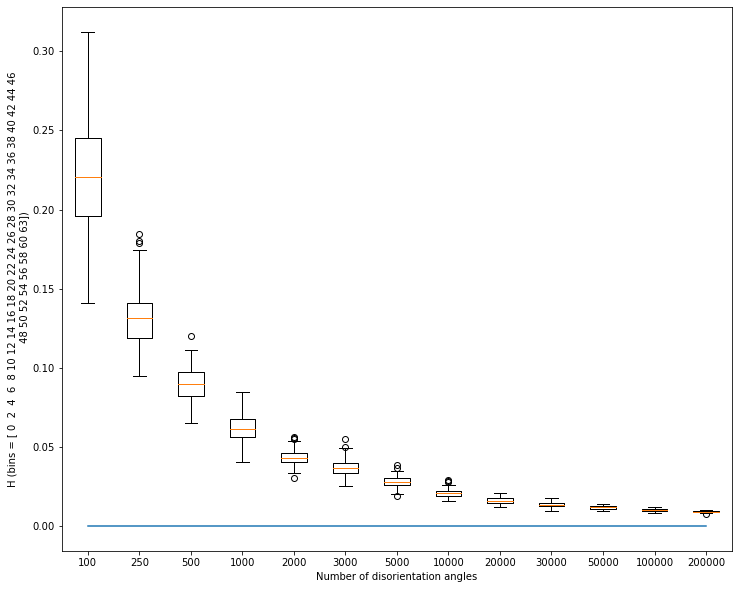

In [101]:
plt.figure(figsize=(12,10))
bins = np.array([*range(0, 62, 2)] + [63])
Q = matutils.mackenzie_pmf(np.array(bins))
ps = {}
Hs = {}
for size in sizes:
    Hs[size] = []
    for i in range(N):
        P = np.histogram(samples[size][i], bins=bins)[0] / len(samples[size][i])
        Hs[size].append(H2(P, Q))

plt.boxplot(Hs.values(), labels=[*map(str,sizes)])
plt.plot([*range(1, len(sizes) + 1)], [0]*len(sizes))
# plt.legend(loc='best')
plt.xlabel('Number of disorientation angles')
plt.ylabel(f'H (bins = {bins})')
plt.show()

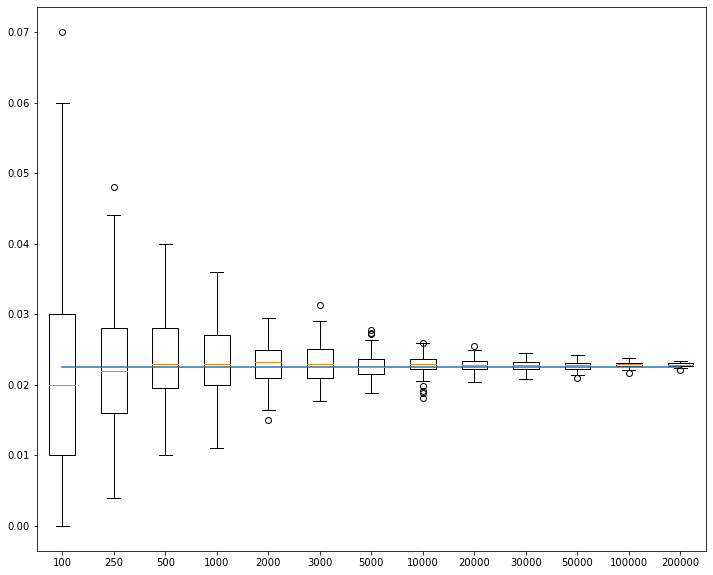

In [51]:
plt.figure(figsize=(12,10))
ps = {}
for size in sizes:
    ps[size] = []
    for i in range(N):
        ps[size].append(np.histogram(samples[size][i], bins=[0, 15, 63])[0][0] / len(samples[size][i]))
plt.boxplot(ps.values(), labels=[*map(str,sizes)])
plt.plot([*range(1, len(sizes) + 1)], [0.0226]*len(sizes))
# plt.legend(loc='best')
plt.show()

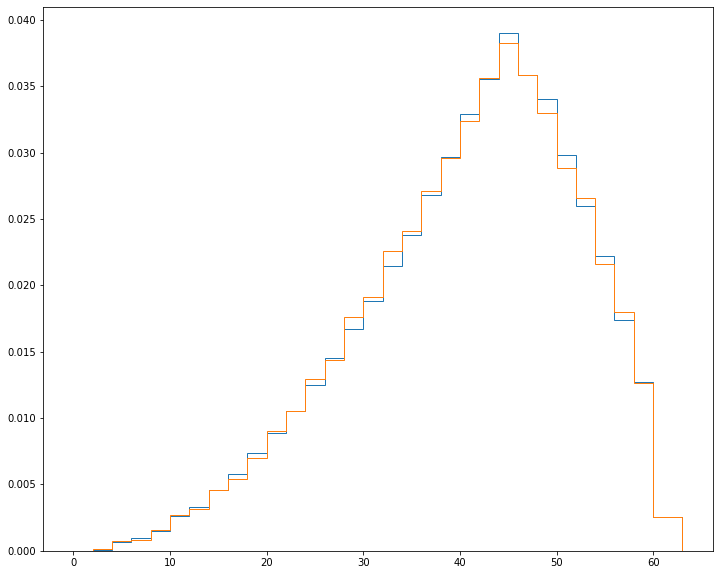

In [14]:
plt.figure(figsize=(12,10))
plt.hist(random_distr2, bins=x, density=True, histtype='step')
plt.hist(random_distr, bins=x, density=True, histtype='step')
plt.show()

In [52]:
def H2(P, Q):
    """
    """
    return np.sqrt(((np.sqrt(P) - np.sqrt(Q)) ** 2).sum()) / math.sqrt(2)

$$
H = \frac{1}{\sqrt2}\sqrt{(\sqrt{p} - \sqrt{0.02277})^2 + (\sqrt{1 - p} - \sqrt{0.9774})^2}
$$

In [69]:
p_array = np.arange(0, 0.5, 0.001)

In [70]:
p_array = np.arange(0, 0.5, 0.001)
P_array = [np.array([p, 1 - p]) for p in p_array] 

In [65]:
P_array

[array([0., 1.]),
 array([0.01, 0.99]),
 array([0.02, 0.98]),
 array([0.03, 0.97]),
 array([0.04, 0.96]),
 array([0.05, 0.95]),
 array([0.06, 0.94]),
 array([0.07, 0.93]),
 array([0.08, 0.92]),
 array([0.09, 0.91]),
 array([0.1, 0.9]),
 array([0.11, 0.89]),
 array([0.12, 0.88]),
 array([0.13, 0.87]),
 array([0.14, 0.86]),
 array([0.15, 0.85]),
 array([0.16, 0.84]),
 array([0.17, 0.83]),
 array([0.18, 0.82]),
 array([0.19, 0.81]),
 array([0.2, 0.8]),
 array([0.21, 0.79]),
 array([0.22, 0.78]),
 array([0.23, 0.77]),
 array([0.24, 0.76]),
 array([0.25, 0.75]),
 array([0.26, 0.74]),
 array([0.27, 0.73]),
 array([0.28, 0.72]),
 array([0.29, 0.71]),
 array([0.3, 0.7]),
 array([0.31, 0.69]),
 array([0.32, 0.68]),
 array([0.33, 0.67]),
 array([0.34, 0.66]),
 array([0.35, 0.65]),
 array([0.36, 0.64]),
 array([0.37, 0.63]),
 array([0.38, 0.62]),
 array([0.39, 0.61]),
 array([0.4, 0.6]),
 array([0.41, 0.59]),
 array([0.42, 0.58]),
 array([0.43, 0.57]),
 array([0.44, 0.56]),
 array([0.45, 0.55]),


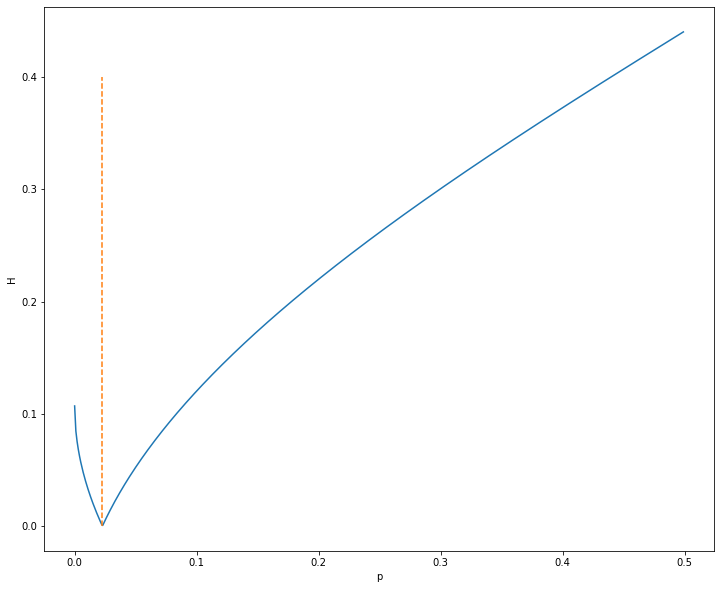

In [83]:
Q = np.array([0.02277, 0.9774])
p_array = np.arange(0, 0.5, 0.001)
P_array = [np.array([p, 1 - p]) for p in p_array] 
plt.figure(figsize=(12,10))
plt.plot([P[0] for P in P_array], [H2(P,Q) for P in P_array])
plt.plot([0.02277]*100, np.linspace(0, 0.4, 100), '--')
plt.xlabel('p')
plt.ylabel('H')
plt.show()

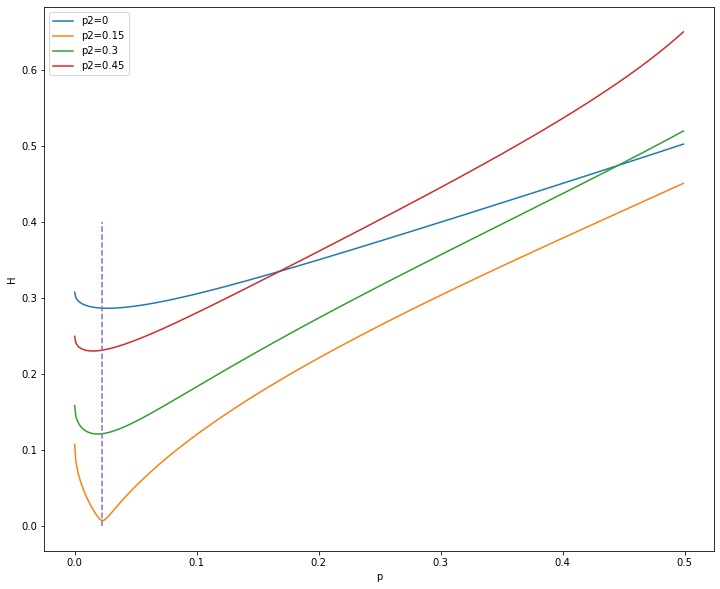

In [84]:
Q = matutils.mackenzie_pmf(np.array([0, 15, 30, 63]))
p_array = np.arange(0, 0.5, 0.001)
p2s = [0, 0.15, 0.3, 0.45]

plt.figure(figsize=(12,10))
for p2 in p2s:
    P_array = [np.array([p, p2, 1 - p - p2]) for p in p_array] 
    plt.plot([P[0] for P in P_array], [H2(P,Q) for P in P_array], label=f'p2={p2}')
plt.plot([0.02277]*100, np.linspace(0, 0.4, 100), '--')
plt.legend()
plt.xlabel('p')
plt.ylabel('H')
plt.show()

In [79]:
P_array

[array([0.  , 0.45, 0.55]),
 array([0.001, 0.45 , 0.549]),
 array([0.002, 0.45 , 0.548]),
 array([0.003, 0.45 , 0.547]),
 array([0.004, 0.45 , 0.546]),
 array([0.005, 0.45 , 0.545]),
 array([0.006, 0.45 , 0.544]),
 array([0.007, 0.45 , 0.543]),
 array([0.008, 0.45 , 0.542]),
 array([0.009, 0.45 , 0.541]),
 array([0.01, 0.45, 0.54]),
 array([0.011, 0.45 , 0.539]),
 array([0.012, 0.45 , 0.538]),
 array([0.013, 0.45 , 0.537]),
 array([0.014, 0.45 , 0.536]),
 array([0.015, 0.45 , 0.535]),
 array([0.016, 0.45 , 0.534]),
 array([0.017, 0.45 , 0.533]),
 array([0.018, 0.45 , 0.532]),
 array([0.019, 0.45 , 0.531]),
 array([0.02, 0.45, 0.53]),
 array([0.021, 0.45 , 0.529]),
 array([0.022, 0.45 , 0.528]),
 array([0.023, 0.45 , 0.527]),
 array([0.024, 0.45 , 0.526]),
 array([0.025, 0.45 , 0.525]),
 array([0.026, 0.45 , 0.524]),
 array([0.027, 0.45 , 0.523]),
 array([0.028, 0.45 , 0.522]),
 array([0.029, 0.45 , 0.521]),
 array([0.03, 0.45, 0.52]),
 array([0.031, 0.45 , 0.519]),
 array([0.032, 0.45 

In [75]:
matutils.mackenzie_pmf(np.array([0, 15, 30, 63]))

array([0.02277, 0.15751, 0.81972])

In [ ]:
np.histogram(angles, bins=[0, 15, 30, 45, 60, 63])[0] / len(angles)

In [20]:
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62])

In [21]:
random_distr

array([30.792, 23.052, 31.796, ..., 48.944, 17.714, 36.49 ])

In [22]:
angles = random_distr[random_distr <= 62]
p = get_p(angles)[0]
P = np.histogram(angles, bins=x)[0] / len(angles)

In [16]:
matutils._cdf1(15)

0.022768141069261515

In [95]:
p2_baseline = 0.0226
x = np.arange(0, 63, 2)
Q_baseline = np.concatenate([np.diff(cdf2(x[:-1])), [0.00772]])

In [ ]:
plt.hist(angles, density=True, histtype='step')
plt.plot(x, y)
plt.show()

In [89]:
np.concatenate([np.diff(cdf2(x[:-1])), [0.00772]]).shape

(31,)

In [56]:
x = np.arange(0, 63, 2)

In [60]:
x = np.array([*range(0, 62, 2)] + [63])

In [61]:
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 63])

In [66]:
y = matutils.mackenzie(x)

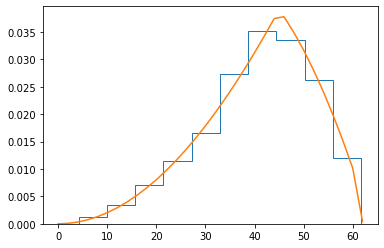

In [68]:
plt.hist(angles, density=True, histtype='step')
plt.plot(x, y)
plt.show()

In [53]:
len(angles)

290

In [ ]:

        for g1 in tqdm(self._grains.values()):
            n_ids = getattr(g1, f'n{order}_ids')
            for n_id in n_ids:
                if g1.id < n_id:
                    angle = matutils.calculate_disorient(
                        g1.rot_mtx,
                        self._grains[n_id].rot_mtx,
                        g1.crysym)
                    angles.append(angle)
        return angles